# Basics of MLP
- Objective: create vanilla neural networks (i.e., Multilayer perceptrons) for simple regression/classification tasks with Keras

## MLP Structures
- Each MLP model is consisted of one input layer, several hidden layers, and one output layer
- Number of neurons in each layer is not limited
<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" style="width: 300px"/>
<br>
<center>**MLP with one hidden layer**</center>
- Number of input neurons: 3
- Number of hidden neurons: 4
- Number of output neurons: 2

## MLP for Regression tasks
- When the target (**y**) is continuous (real)
- For loss function and evaluation metric, mean squared error (MSE) is commonly used

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Load the Dataset

In [2]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Exploratory Data Analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.dropna(inplace=True)
df=df.drop('ocean_proximity', axis=1)
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


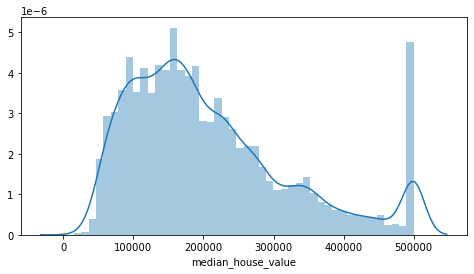

In [7]:
plt.figure(figsize=(8,4))
sns.distplot(df['median_house_value'])

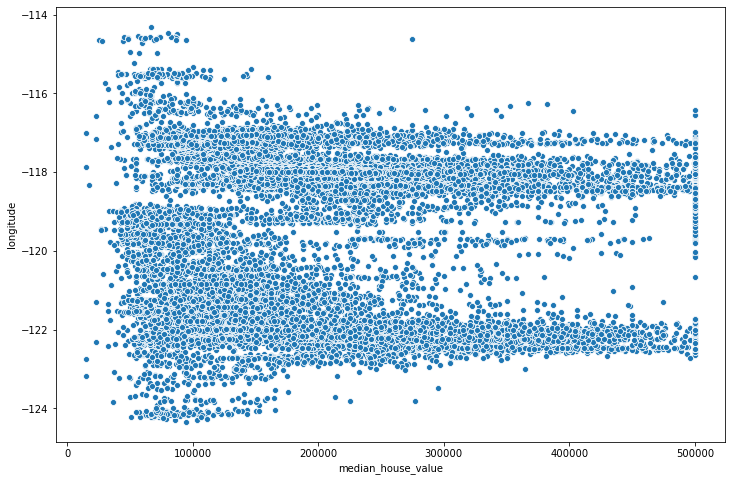

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='median_house_value',y='longitude',data=df)

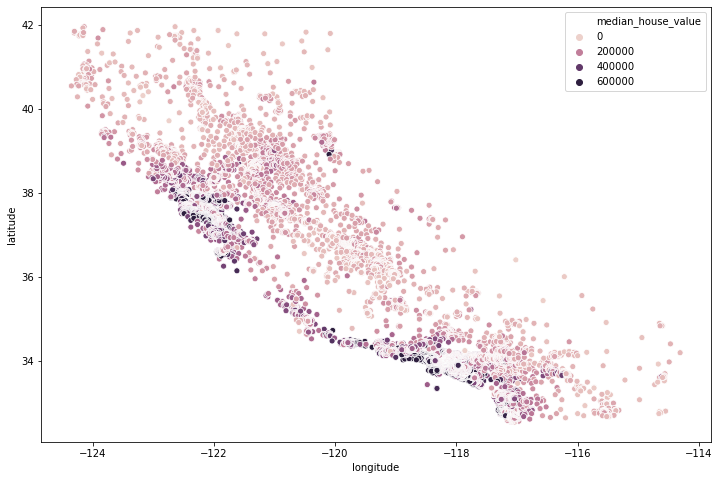

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude',y='latitude',data=df,hue='median_house_value')

In [10]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


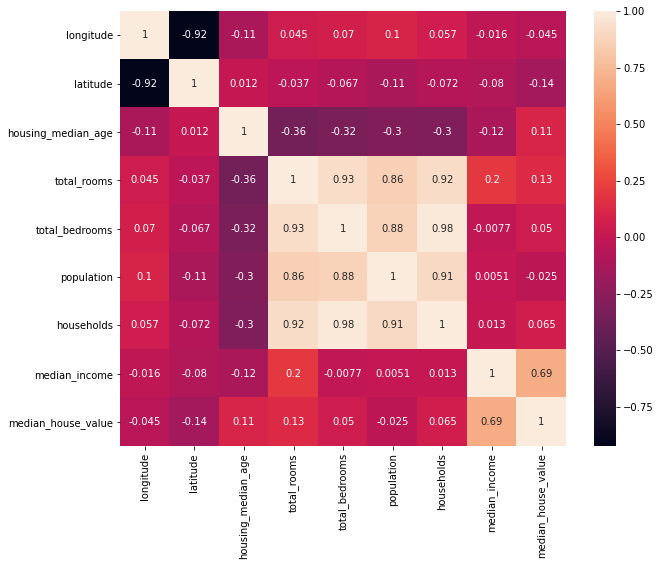

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

### Scaling and Train Test Split


In [12]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Scaling


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating a Model


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

model = Sequential()
#model.add(Dense(8,activation='relu'))
#model.add(Dense(3,activation='relu'))
#model.add(Dense(1))
#model.compile(optimizer=SGD(lr = 0.01), loss='mse')
#model.summary()
#model.compile(optimizer='adam', loss='mse')

# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(7, input_shape = (8,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(6))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(6))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 7)                 63        
_________________________________________________________________
activation (Activation)      (None, 7)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 48        
_________________________________________________________________
activation_1 (Activation)    (None, 6)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 42        
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [27]:
from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import SGD

sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed

In [28]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
112/112 [==============================] - 0s 1ms/step - loss: 15164945408.0000 - mse: 15164945408.0000 - val_loss: 13340095488.0000 - val_mse: 13340095488.0000
Epoch 2/400
112/112 [==============================] - 0s 785us/step - loss: 13323336704.0000 - mse: 13323336704.0000 - val_loss: 13332761600.0000 - val_mse: 13332761600.0000
Epoch 3/400
112/112 [==============================] - 0s 756us/step - loss: 13327139840.0000 - mse: 13327139840.0000 - val_loss: 13365069824.0000 - val_mse: 13365069824.0000
Epoch 4/400
112/112 [==============================] - 0s 763us/step - loss: 13327754240.0000 - mse: 13327754240.0000 - val_loss: 13332383744.0000 - val_mse: 13332383744.0000
Epoch 5/400
112/112 [==============================] - 0s 769us/step - loss: 13328956416.0000 - mse: 13328956416.0000 - val_loss: 13359927296.0000 - val_mse: 13359927296.0000
Epoch 6/400
112/112 [==============================] - 0s 769us/step - loss: 13328879616.0000 - mse: 13328879616.0000 - val_los

112/112 [==============================] - 0s 759us/step - loss: 13328244736.0000 - mse: 13328244736.0000 - val_loss: 13332008960.0000 - val_mse: 13332008960.0000
Epoch 48/400
112/112 [==============================] - 0s 764us/step - loss: 13322438656.0000 - mse: 13322438656.0000 - val_loss: 13332985856.0000 - val_mse: 13332985856.0000
Epoch 49/400
112/112 [==============================] - 0s 778us/step - loss: 13326743552.0000 - mse: 13326743552.0000 - val_loss: 13330970624.0000 - val_mse: 13330970624.0000
Epoch 50/400
112/112 [==============================] - 0s 758us/step - loss: 13323726848.0000 - mse: 13323726848.0000 - val_loss: 13331512320.0000 - val_mse: 13331512320.0000
Epoch 51/400
112/112 [==============================] - 0s 769us/step - loss: 13332026368.0000 - mse: 13332026368.0000 - val_loss: 13331681280.0000 - val_mse: 13331681280.0000
Epoch 52/400
112/112 [==============================] - 0s 764us/step - loss: 13325564928.0000 - mse: 13325564928.0000 - val_loss: 13

112/112 [==============================] - 0s 782us/step - loss: 13329454080.0000 - mse: 13329454080.0000 - val_loss: 13332448256.0000 - val_mse: 13332448256.0000
Epoch 94/400
112/112 [==============================] - 0s 761us/step - loss: 13328648192.0000 - mse: 13328648192.0000 - val_loss: 13336077312.0000 - val_mse: 13336077312.0000
Epoch 95/400
112/112 [==============================] - 0s 766us/step - loss: 13329025024.0000 - mse: 13329025024.0000 - val_loss: 13338107904.0000 - val_mse: 13338107904.0000
Epoch 96/400
112/112 [==============================] - 0s 728us/step - loss: 13322270720.0000 - mse: 13322270720.0000 - val_loss: 13359996928.0000 - val_mse: 13359996928.0000
Epoch 97/400
112/112 [==============================] - 0s 749us/step - loss: 13332258816.0000 - mse: 13332258816.0000 - val_loss: 13345253376.0000 - val_mse: 13345253376.0000
Epoch 98/400
112/112 [==============================] - 0s 775us/step - loss: 13324576768.0000 - mse: 13324576768.0000 - val_loss: 13

112/112 [==============================] - 0s 764us/step - loss: 13330075648.0000 - mse: 13330075648.0000 - val_loss: 13381518336.0000 - val_mse: 13381518336.0000
Epoch 140/400
112/112 [==============================] - 0s 760us/step - loss: 13328944128.0000 - mse: 13328944128.0000 - val_loss: 13349069824.0000 - val_mse: 13349069824.0000
Epoch 141/400
112/112 [==============================] - 0s 769us/step - loss: 13330790400.0000 - mse: 13330791424.0000 - val_loss: 13350261760.0000 - val_mse: 13350261760.0000
Epoch 142/400
112/112 [==============================] - 0s 755us/step - loss: 13328174080.0000 - mse: 13328174080.0000 - val_loss: 13342598144.0000 - val_mse: 13342598144.0000
Epoch 143/400
112/112 [==============================] - 0s 741us/step - loss: 13327067136.0000 - mse: 13327067136.0000 - val_loss: 13332703232.0000 - val_mse: 13332703232.0000
Epoch 144/400
112/112 [==============================] - 0s 765us/step - loss: 13328523264.0000 - mse: 13328523264.0000 - val_los

112/112 [==============================] - 0s 744us/step - loss: 13328373760.0000 - mse: 13328373760.0000 - val_loss: 13349232640.0000 - val_mse: 13349232640.0000
Epoch 186/400
112/112 [==============================] - 0s 755us/step - loss: 13328354304.0000 - mse: 13328354304.0000 - val_loss: 13332655104.0000 - val_mse: 13332655104.0000
Epoch 187/400
112/112 [==============================] - 0s 738us/step - loss: 13329427456.0000 - mse: 13329427456.0000 - val_loss: 13338508288.0000 - val_mse: 13338508288.0000
Epoch 188/400
112/112 [==============================] - 0s 754us/step - loss: 13328875520.0000 - mse: 13328875520.0000 - val_loss: 13331291136.0000 - val_mse: 13331291136.0000
Epoch 189/400
112/112 [==============================] - 0s 757us/step - loss: 13327717376.0000 - mse: 13327717376.0000 - val_loss: 13332822016.0000 - val_mse: 13332822016.0000
Epoch 190/400
112/112 [==============================] - 0s 757us/step - loss: 13330200576.0000 - mse: 13330200576.0000 - val_los

112/112 [==============================] - 0s 796us/step - loss: 13322361856.0000 - mse: 13322361856.0000 - val_loss: 13352604672.0000 - val_mse: 13352604672.0000
Epoch 232/400
112/112 [==============================] - 0s 766us/step - loss: 13328494592.0000 - mse: 13328494592.0000 - val_loss: 13365407744.0000 - val_mse: 13365407744.0000
Epoch 233/400
112/112 [==============================] - 0s 775us/step - loss: 13325498368.0000 - mse: 13325498368.0000 - val_loss: 13330949120.0000 - val_mse: 13330949120.0000
Epoch 234/400
112/112 [==============================] - 0s 776us/step - loss: 13329917952.0000 - mse: 13329917952.0000 - val_loss: 13348507648.0000 - val_mse: 13348507648.0000
Epoch 235/400
112/112 [==============================] - 0s 758us/step - loss: 13328637952.0000 - mse: 13328637952.0000 - val_loss: 13341438976.0000 - val_mse: 13341438976.0000
Epoch 236/400
112/112 [==============================] - 0s 789us/step - loss: 13328963584.0000 - mse: 13328963584.0000 - val_los

112/112 [==============================] - 0s 767us/step - loss: 13328668672.0000 - mse: 13328668672.0000 - val_loss: 13344648192.0000 - val_mse: 13344648192.0000
Epoch 278/400
112/112 [==============================] - 0s 772us/step - loss: 13327554560.0000 - mse: 13327554560.0000 - val_loss: 13341913088.0000 - val_mse: 13341913088.0000
Epoch 279/400
112/112 [==============================] - 0s 758us/step - loss: 13332446208.0000 - mse: 13332446208.0000 - val_loss: 13336414208.0000 - val_mse: 13336414208.0000
Epoch 280/400
112/112 [==============================] - 0s 791us/step - loss: 13331471360.0000 - mse: 13331471360.0000 - val_loss: 13330936832.0000 - val_mse: 13330936832.0000
Epoch 281/400
112/112 [==============================] - 0s 801us/step - loss: 13330010112.0000 - mse: 13330010112.0000 - val_loss: 13341528064.0000 - val_mse: 13341528064.0000
Epoch 282/400
112/112 [==============================] - 0s 755us/step - loss: 13330172928.0000 - mse: 13330172928.0000 - val_los

112/112 [==============================] - 0s 802us/step - loss: 13328015360.0000 - mse: 13328015360.0000 - val_loss: 13346214912.0000 - val_mse: 13346214912.0000
Epoch 324/400
112/112 [==============================] - 0s 763us/step - loss: 13328871424.0000 - mse: 13328871424.0000 - val_loss: 13339397120.0000 - val_mse: 13339397120.0000
Epoch 325/400
112/112 [==============================] - 0s 756us/step - loss: 13328988160.0000 - mse: 13328988160.0000 - val_loss: 13353534464.0000 - val_mse: 13353534464.0000
Epoch 326/400
112/112 [==============================] - 0s 774us/step - loss: 13328221184.0000 - mse: 13328221184.0000 - val_loss: 13338221568.0000 - val_mse: 13338221568.0000
Epoch 327/400
112/112 [==============================] - 0s 779us/step - loss: 13327442944.0000 - mse: 13327442944.0000 - val_loss: 13339248640.0000 - val_mse: 13339248640.0000
Epoch 328/400
112/112 [==============================] - 0s 788us/step - loss: 13329531904.0000 - mse: 13329531904.0000 - val_los

112/112 [==============================] - 0s 778us/step - loss: 13327858688.0000 - mse: 13327858688.0000 - val_loss: 13333583872.0000 - val_mse: 13333583872.0000
Epoch 370/400
112/112 [==============================] - 0s 760us/step - loss: 13331503104.0000 - mse: 13331503104.0000 - val_loss: 13336783872.0000 - val_mse: 13336783872.0000
Epoch 371/400
112/112 [==============================] - 0s 784us/step - loss: 13324879872.0000 - mse: 13324879872.0000 - val_loss: 13369565184.0000 - val_mse: 13369565184.0000
Epoch 372/400
112/112 [==============================] - 0s 761us/step - loss: 13327419392.0000 - mse: 13327419392.0000 - val_loss: 13331177472.0000 - val_mse: 13331177472.0000
Epoch 373/400
112/112 [==============================] - 0s 763us/step - loss: 13330573312.0000 - mse: 13330573312.0000 - val_loss: 13331018752.0000 - val_mse: 13331018752.0000
Epoch 374/400
112/112 [==============================] - 0s 786us/step - loss: 13325768704.0000 - mse: 13325768704.0000 - val_los

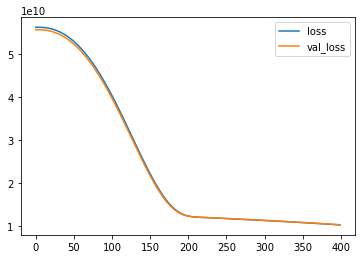

In [20]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Evaluation

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)
print('Mean_absolute_error', mean_absolute_error(y_test,predictions))
print('Mean_squared_error', np.sqrt(mean_squared_error(y_test,predictions)))

Mean_absolute_error 81419.53090716762
Mean_squared_error 101887.37957800919
